In [53]:
import numpy as np
from matplotlib import pyplot as plt


# 3-1

In [54]:
def computecorrcoefNcosine(x, y):
    num = np.dot(x,y)
    cos = num / (np.linalg.norm(x) * np.linalg.norm(y))
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    cor = np.dot(xm, ym) / (np.linalg.norm(xm) * np.linalg.norm(ym))
    
    return cor, cos

a = np.random.randn(15)
b = np.random.randn(15)

cor, cos = computecorrcoefNcosine(a, b)

print(cor, np.corrcoef(a, b))


-0.46600435545395463 [[ 1.         -0.46600436]
 [-0.46600436  1.        ]]


# 3 - 2

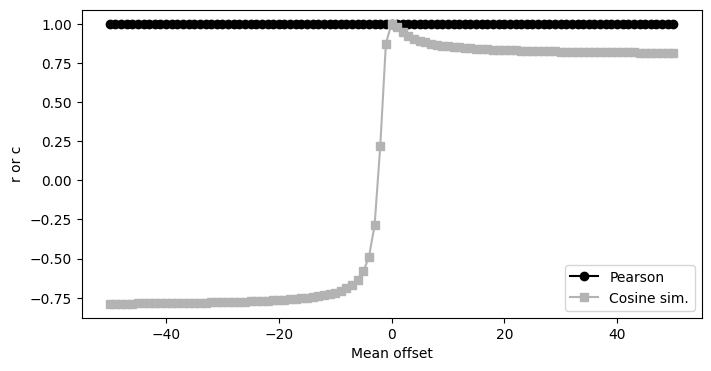

In [55]:
a = np.arange(4, dtype=float)
offsets = np.arange(-50,51)


result = np.zeros((len(offsets), 2))

for i in range(len(offsets)):
    result[i,:] = computecorrcoefNcosine(a, a + offsets[i])
    # (a, a+ -50), (a, a + -49),(a, a + -48),(a, a + -47),(a, a + -46),
plt.figure(figsize=(8,4))
h = plt.plot(offsets,result)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7, .7, .7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
# plt.savefig('Figure_03_02.png',dpi=300) # write out the fig to a file
plt.show()

# 3-3


In [56]:
from scipy.stats import pearsonr

pearsonr

<function scipy.stats._stats_py.pearsonr(x, y, *, alternative='two-sided', method=None)>

# 3-4



In [57]:
import time

def myCorrcoef(x, y):
    difx = x - np.mean(x)
    dify = y - np.mean(y)
    correff = np.dot(difx, dify) / (np.linalg.norm(difx) * np.linalg.norm(difx))
    
    return correff

start = time.time()

for i in range(1000):
    x = np.random.randn(500,2)
    print(myCorrcoef(x[:, 0], x[:, 1]))
    

end = time.time()

ret1 = end - start

start = time.time()

for i in range(1000):
    x = np.random.randn(500,2)
    print(np.corrcoef(x[:, 0], x[:, 1]))

end = time.time()

ret2 = end - start
print(ret1, ret2)

0.053821294337194396
0.03720239996076202
-0.09864605223943682
0.04867366462120481
0.05537468779877574
0.11062848234369206
-0.09414665354987263
-0.016947719634207565
-0.028774909222253075
-0.04373996433895912
0.005345991076633861
0.04574424898632887
0.03422553698352931
0.03441088845484885
-0.010370937339317886
0.002520078890729511
0.007661482025023317
0.043117925700389144
-0.008747893138504426
0.011959748176857507
-0.05770177956727733
0.014033218539550722
0.04105854623390113
0.02101231244163219
0.020348187071064467
0.15171204258673235
-0.04063023121823689
0.057120785732047645
-0.08077762077319482
0.006858956011557477
-0.005107164344307354
-0.04808465794468328
-0.045312261261292175
0.0009564905631039274
0.011105630741865078
-0.017787559134375453
-0.031160431536699326
0.022067689099657006
-0.0309534643090922
-0.05064607801308241
-0.010542015046853048
-0.11815334249294843
-0.04007124518284877
-0.025108158737541776
0.03054655000132092
0.027592016253238358
-0.07243162690748577
0.095095985725

# 3-5


In [58]:
kernel = np.array([-1, 1])
signal = np.zeros(30)
signal[10:20] = 1

# _, axes = plt.subplots(1,2,figsize = (12, 4))
# axes[0].plot(kernel, 'ks-')
# axes[0].set_title('Kernel')
# axes[0].set_xlim([-15,15])

# axes[1].plot(signal, 'ks-')
# axes[1].set_title('sinal')


plt.show()

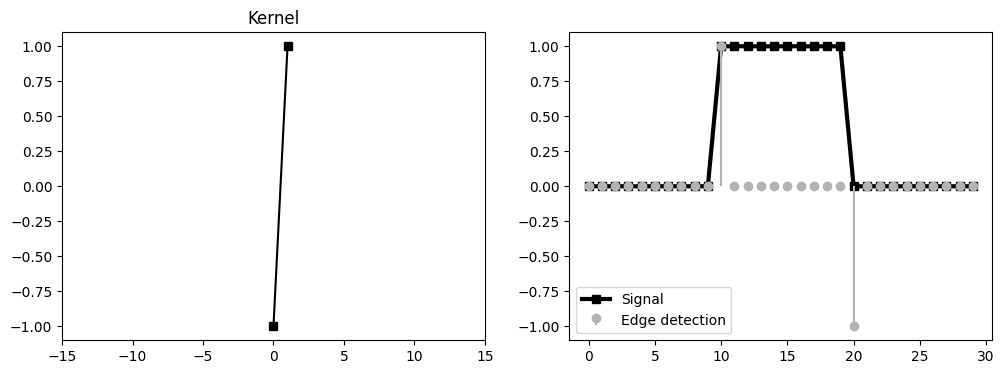

In [59]:
ret = np.zeros(30)
for i in range(1, len(signal) - 1): # 중요
    ret[i] = np.dot(signal[i - 1: i + 1], kernel)   # 합성곱 ==> 000000
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])
axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(ret)),ret,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection') # ret 을 stem 스타일로 표시

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.show()

# 3-6

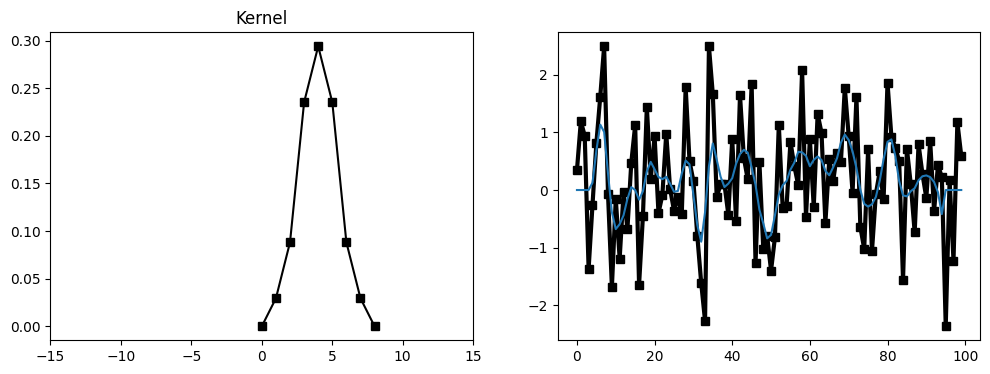

In [60]:
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)
signal = np.random.randn(100) #가우시안 난수
ret = np.zeros(100)
for i in range(4, len(signal) - 5): # 중요
    ret[i] = np.dot(signal[i - 4: i + 5], kernel) 
      
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])
axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
axs[1].plot(ret, )


plt.show()

# 3-7


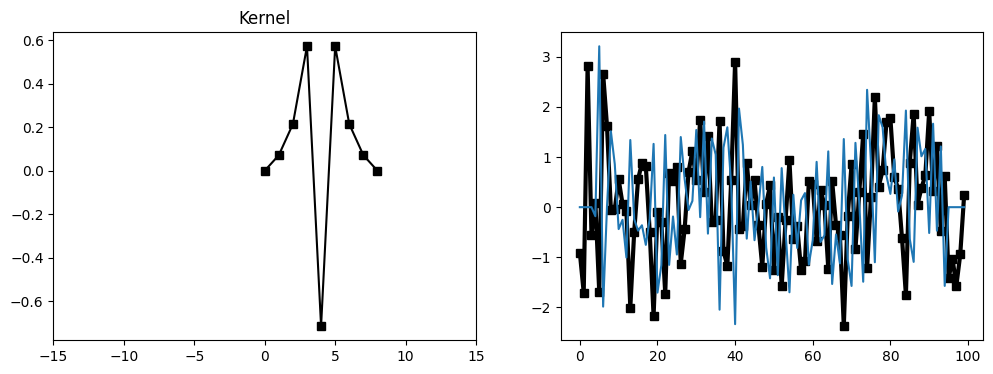

In [61]:
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)
signal = np.random.randn(100) #가우시안 난수
ret = np.zeros(100)
for i in range(4, len(signal) - 5): # 중요
    ret[i] = np.dot(signal[i - 4: i + 5], kernel) 
      
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])
axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
axs[1].plot(ret, )

# 3-8
